<a href="https://colab.research.google.com/github/CardenasFrancisco/DigitalBooking-Hoteles/blob/main/Raster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<image src="https://drive.google.com/uc?export=view&id=1uLqUQvA1Tkyy1bcqmmGCpAhi79lscJHE" width=100%>


# **Aplicación del método de pesos de evidencia**

Caso de estudio: [Servicio Geológico Colombiano (2015). Zonificación Geomecánica y de amenaza por movimientos en masa del municipio de Popayán, Cauca.](https://recordcenter.sgc.gov.co/B7/21003002524656/Documento/Pdf/2105246561101000.pdf)


<image src="https://drive.google.com/uc?export=view&id=1p-8FjVWj59o0eNwU2rCXP8PxuMvHIS_d" width=100%>

## **P1: Cargar los datos ráster**

In [ ]:
# Importar librerías

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensiones del condicionante 1: (227, 157)
Dimensiones del condicionante 2: (227, 157)
Dimensiones del condicionante 3: (227, 157)
Dimensiones del condicionante 4: (227, 157)
Dimensiones de deslizamientos 1: (227, 157)


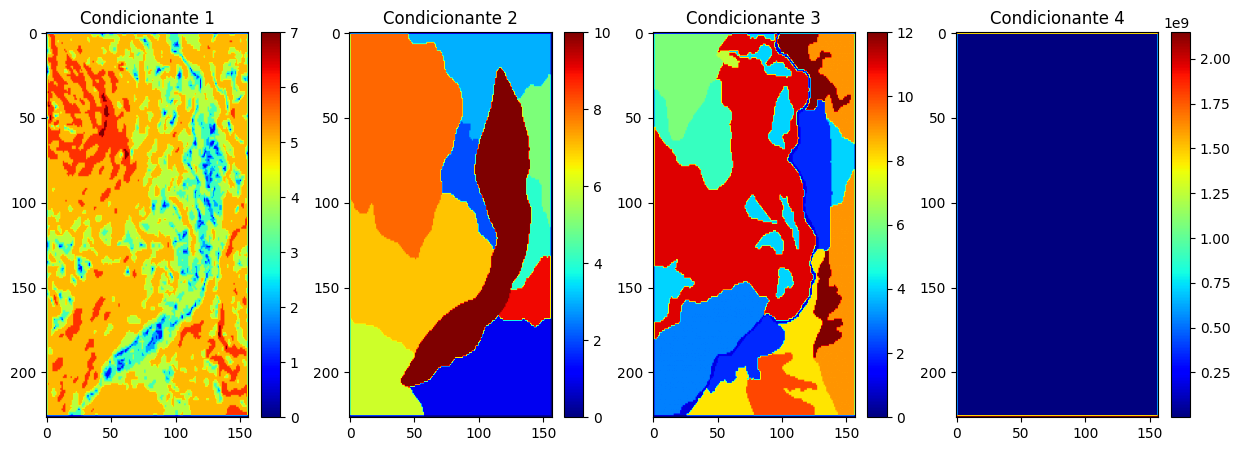

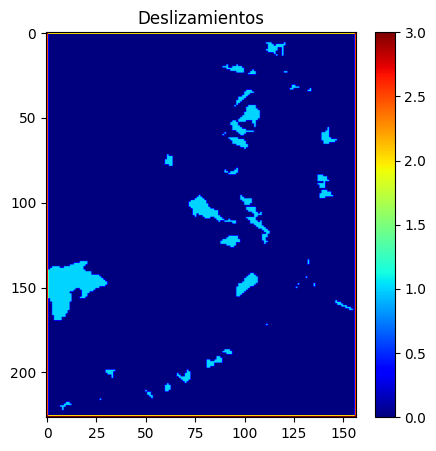

In [ ]:
# Importar librerías
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Función para cargar un archivo raster y convertirlo en una matriz numpy
def cargar_raster(ruta):
    raster = gdal.Open(ruta)
    if raster is None:
        print(f"No se pudo abrir el archivo: {ruta}")
        return None
    return raster.GetRasterBand(1).ReadAsArray().astype(np.float64)

# Lista con las rutas de los archivos de condicionantes
rutas_condicionantes = [
    '/content/drive/MyDrive/carpetacolab/Condicionantes/Cpendiente.tif',
    '/content/drive/MyDrive/carpetacolab/Condicionantes/CGeologia_R1.tif',
    '/content/drive/MyDrive/carpetacolab/Condicionantes/Ccobertura.tif',
    '/content/drive/MyDrive/carpetacolab/Condicionantes/CAcuenca.tif',
    # Agrega aquí las rutas de tus otros archivos de condicionantes
]

# Lista con las rutas de los archivos de deslizamientos
rutas_deslizamientos = [
    '/content/drive/MyDrive/carpetacolab/Deslizamientos/DmM.tif',
    # Agrega aquí las rutas de tus otros archivos de deslizamientos
]

# Lista para almacenar las matrices numpy de los condicionantes
condicionantes_matrices = []

# Cargar y convertir los condicionantes en matrices numpy
for ruta_condicionante in rutas_condicionantes:
    matriz_condicionante = cargar_raster(ruta_condicionante)
    if matriz_condicionante is not None:
        condicionantes_matrices.append(matriz_condicionante)

# Lista para almacenar las matrices numpy de los deslizamientos
deslizamientos_matrices = []

# Cargar y convertir los deslizamientos en matrices numpy
for ruta_deslizamientos in rutas_deslizamientos:
    matriz_deslizamientos = cargar_raster(ruta_deslizamientos)
    if matriz_deslizamientos is not None:
        deslizamientos_matrices.append(matriz_deslizamientos)

# Verificar las dimensiones de las matrices cargadas
for idx, matriz_condicionante in enumerate(condicionantes_matrices, 1):
    print(f"Dimensiones del condicionante {idx}: {matriz_condicionante.shape}")

for idx, matriz_deslizamientos in enumerate(deslizamientos_matrices, 1):
    print(f"Dimensiones de deslizamientos {idx}: {matriz_deslizamientos.shape}")

# Graficar todos los condicionantes
plt.figure(figsize=(15, 5))
num_condicionantes = len(condicionantes_matrices)
for i in range(num_condicionantes):
    plt.subplot(1, num_condicionantes, i+1)
    plt.imshow(condicionantes_matrices[i], aspect='auto', cmap='jet')
    plt.title(f'Condicionante {i+1}')
    plt.colorbar()

plt.show()

# Graficar los deslizamientos (puedes ajustar el índice para graficar otros)
plt.figure(figsize=(5, 5))
plt.imshow(deslizamientos_matrices[0], aspect='auto', cmap='jet')
plt.title('Deslizamientos')
plt.colorbar()

plt.show()





In [ ]:
# Verificar que el tamaño de ambos arrays sea igual para todos los índices
num_condicionantes = len(condicionantes_matrices)
num_deslizamientos = len(deslizamientos_matrices)

for i in range(num_condicionantes):
    print(f"Dimensiones del ráster {i+1} del factor condicionante: {condicionantes_matrices[i].shape}")

for i in range(num_deslizamientos):
    print(f"Dimensiones del ráster {i+1} de movimientos en masa: {deslizamientos_matrices[i].shape}")



Dimensiones del ráster 1 del factor condicionante: (227, 157)
Dimensiones del ráster 2 del factor condicionante: (227, 157)
Dimensiones del ráster 3 del factor condicionante: (227, 157)
Dimensiones del ráster 4 del factor condicionante: (227, 157)
Dimensiones del ráster 1 de movimientos en masa: (227, 157)


## **P2: Extraer los valores nulos**

In [ ]:
# Lista para almacenar los dataframes de resultados
resultados_df_list = []

# Recorrer todas las imágenes de condicionantes y deslizamientos
for idx, (ruta_condicionante, ruta_deslizamiento) in enumerate(zip(rutas_condicionantes, rutas_deslizamientos), 1):
    print(f"Procesando imagen {idx}...")

    # Cargar y convertir el condicionante y deslizamiento en matrices numpy
    condicionante = cargar_raster(ruta_condicionante)
    deslizamiento = cargar_raster(ruta_deslizamiento)

    if condicionante is None or deslizamiento is None:
        continue  # Si hay un problema con la carga de la imagen, saltar a la siguiente

    # Obtener el valor mínimo (valor de NoData) de la matriz del condicionante
    Nonvaluec = np.nanmin(condicionante)

    # Obtener el valor máximo (valor de NoData) de la matriz del deslizamiento
    Nonvalued = np.nanmax(deslizamiento)

    # Extraer los valores de interés para el condicionante y deslizamiento
    cop_values = condicionante[condicionante != Nonvaluec]
    cop_2_values = deslizamiento[deslizamiento != Nonvalued]

Procesando imagen 1...


In [ ]:
len(cop_values)


34875

In [ ]:
len(cop_2_values)

34875

In [ ]:
cop_2_values.max()

1.0

## **P3: Crear un dataframe**

In [ ]:
# Importar librería

import pandas as pd

In [ ]:
# Crear dataframe vacío

df = pd.DataFrame()

In [ ]:
df

""


## **P4: Calcular Npix1**

In [ ]:
# Calcular el número de deslizamientos por cada clase
rz = cop_values* cop_2_values


In [ ]:
rz

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
rz.max()

7.0

In [ ]:
# Calcular el total de pixeles en cada clase del factor condicionante

clase, pixeles = np.unique(cop_values, return_counts=True)
pix_c = dict(zip(clase, pixeles))

In [ ]:
pix_c

{1.0: 289, 2.0: 786, 3.0: 3011, 4.0: 8261, 5.0: 18945, 6.0: 3499, 7.0: 84}

In [ ]:
# Calcular el número de movimientos en masa para cada clase del factor condicionante

clases, mm = np.unique(rz, return_counts=True)
pix_rz = dict(zip(clases, mm))

In [ ]:
pix_rz

{0.0: 33433, 1.0: 7, 2.0: 26, 3.0: 68, 4.0: 411, 5.0: 884, 6.0: 42, 7.0: 4}

**Añadir a la tabla los valores calculados**

In [ ]:
# Calcular el número de deslizamientos por cada clase
rz = cop_values * cop_2_values
NPTD = sum(list(pix_rz.values())[1:])
df = pd.DataFrame()
clase, pixeles = np.unique(cop_values, return_counts=True)
pix_c = dict(zip(clase, pixeles))

# Crear una columna 'CLASE' en el DataFrame df con las clases calculadas
df['CLASE'] = list(pix_c.keys())

# Calcular el número de movimientos en masa para cada clase del factor condicionante
clases, mm = np.unique(rz, return_counts=True)
pix_rz = dict(zip(clases, mm))

# Crear una lista de valores de NPIX1 para todas las clases, estableciendo 0 para las clases no presentes en pix_rz
npix1_values = [pix_rz.get(clase, 0) for clase in df['CLASE'].tolist()]

# Añadir la columna NPIX1 al DataFrame con los valores adecuados
df['NPIX1'] = npix1_values

# Ahora podemos llenar cualquier otro valor faltante de NPIX1 con 0
df['NPIX1'] = df['NPIX1'].fillna(0)


In [ ]:
df

,CLASE,NPIX1
0,1.0,7
1,2.0,26
2,3.0,68
3,4.0,411
4,5.0,884
5,6.0,42
6,7.0,4


## **P5: Calcular Npix2**

**A) Calcular NPTD**

In [ ]:
# Calcular la suma de todos los pixeles deslizados en el condicionante analizado. Es decir,
# la suma de pix_rz en la clase 1, 2,3,4...

NPTD = sum(list(pix_rz.values())[1:])

In [ ]:
NPTD

1442

**B) Calcular Npix2**

In [ ]:
df['NPIX2'] = NPTD - df['NPIX1']

In [ ]:
df

,CLASE,NPIX1,NPIX2
0,1.0,7,1435
1,2.0,26,1416
2,3.0,68,1374
3,4.0,411,1031
4,5.0,884,558
5,6.0,42,1400
6,7.0,4,1438


## **P6: Calcular Npix3**

In [ ]:
pix_c

{1.0: 289, 2.0: 786, 3.0: 3011, 4.0: 8261, 5.0: 18945, 6.0: 3499, 7.0: 84}

In [ ]:
# Calcular NPC que es el número de pixeles en cada clase del condicionante analizado

df['NPC'] = list(pix_c.values())

In [ ]:
# Calcular npix3 y añadirlo a la tabla

df['NPIX3'] = df['NPC'] - df['NPIX1']

In [ ]:
df

,CLASE,NPIX1,NPIX2,NPC,NPIX3
0,1.0,7,1435,289,282
1,2.0,26,1416,786,760
2,3.0,68,1374,3011,2943
3,4.0,411,1031,8261,7850
4,5.0,884,558,18945,18061
5,6.0,42,1400,3499,3457
6,7.0,4,1438,84,80


## **P7: Calcular Npix4**

In [ ]:
# Calcular NMAP que es el número de pixeles totales en el mapa, es decir, la suma de todos los pixeles NPC.

NMAP = len(cop_values)

In [ ]:
NMAP

34875

In [ ]:
# Calcular npix4 y añadirlo a la tabla

df['NPIX4'] = NMAP - df['NPIX1'] - df['NPIX2'] - df['NPIX3']

In [ ]:
df

,CLASE,NPIX1,NPIX2,NPC,NPIX3,NPIX4
0,1.0,7,1435,289,282,33151
1,2.0,26,1416,786,760,32673
2,3.0,68,1374,3011,2943,30490
3,4.0,411,1031,8261,7850,25583
4,5.0,884,558,18945,18061,15372
5,6.0,42,1400,3499,3457,29976
6,7.0,4,1438,84,80,33353


## **P8: Calcular W+**

In [ ]:
# Definir función que contiene la ecuación para calcular W+

def Wpos(npix1, npix2, npix3, npix4):
    # Reemplazar los valores NaN e infinitos con cero
    npix1 = np.nan_to_num(npix1)
    npix2 = np.nan_to_num(npix2)
    npix3 = np.nan_to_num(npix3)
    npix4 = np.nan_to_num(npix4)

    pos = np.log1p((npix1 / (npix1 + npix2)) / (npix3 / (npix3 + npix4)))
    return pos

In [ ]:
# Aplicar la función a los datos calculados y añadirlo a la tabla

df['WI+'] = Wpos(df['NPIX1'], df['NPIX2'], df['NPIX3'], df['NPIX4'])



In [ ]:
df

,CLASE,NPIX1,NPIX2,NPC,NPIX3,NPIX4,WI+
0,1.0,7,1435,289,282,33151,0.454584
1,2.0,26,1416,786,760,32673,0.583989
2,3.0,68,1374,3011,2943,30490,0.428992
3,4.0,411,1031,8261,7850,25583,0.794755
4,5.0,884,558,18945,18061,15372,0.758374
5,6.0,42,1400,3499,3457,29976,0.248174
6,7.0,4,1438,84,80,33353,0.769765


## **P9: Calcular W-**

In [ ]:
# Definir función que contiene la ecuación para calcular W-

def Wneg(npix1, npix2, npix3, npix4):
    ratio1 = npix2 / (npix1 + npix2)
    ratio2 = npix4 / (npix3 + npix4)

    neg = np.zeros_like(ratio1)  # Crear un arreglo de ceros del mismo tamaño que los ratios

    # Calcular el logaritmo solo para los valores válidos
    valid_indices = (npix1 + npix2 != 0) & (npix3 + npix4 != 0)  # Filtrar los valores válidos
    neg[valid_indices] = np.log1p(ratio1[valid_indices] / ratio2[valid_indices])


    return neg

In [ ]:
# Aplicar la función a los datos calculados y añadirlo a la tabla

df['WI-'] = Wneg(df['NPIX1'].values, df['NPIX2'].values, df['NPIX3'].values, df['NPIX4'].values)

In [ ]:
df

,CLASE,NPIX1,NPIX2,NPC,NPIX3,NPIX4,WI+,WI-
0,1.0,7,1435,289,282,33151,0.454584,0.694951
1,2.0,26,1416,786,760,32673,0.583989,0.695550
2,3.0,68,1374,3011,2943,30490,0.428992,0.715307
3,4.0,411,1031,8261,7850,25583,0.794755,0.659780
4,5.0,884,558,18945,18061,15372,0.758374,0.610643
5,6.0,42,1400,3499,3457,29976,0.248174,0.733733
6,7.0,4,1438,84,80,33353,0.769765,0.692956


## **P10: Calcular W, pesos finales**

In [ ]:
# Definir función que contiene la ecuación para calcular W

def Wf(pos, neg):
    wf = pos - neg
    return wf


In [ ]:
Wf(df['WI+'], df['WI-'])

0   -0.240367
1   -0.111561
2   -0.286315
3    0.134975
4    0.147731
5   -0.485559
6    0.076808
dtype: float64

In [ ]:
# Aplicar la función a los datos calculados y añadirlo a la tabla

df['Wf'] = df['WI+'] - df['WI-']

In [ ]:
df

,CLASE,NPIX1,NPIX2,NPC,NPIX3,NPIX4,WI+,WI-,Wf
0,1.0,7,1435,289,282,33151,0.454584,0.694951,-0.240367
1,2.0,26,1416,786,760,32673,0.583989,0.695550,-0.111561
2,3.0,68,1374,3011,2943,30490,0.428992,0.715307,-0.286315
3,4.0,411,1031,8261,7850,25583,0.794755,0.659780,0.134975
4,5.0,884,558,18945,18061,15372,0.758374,0.610643,0.147731
5,6.0,42,1400,3499,3457,29976,0.248174,0.733733,-0.485559
6,7.0,4,1438,84,80,33353,0.769765,0.692956,0.076808


# **Créditos**
---

* **Autores:**
  * [Franco cardenas, Ing](https://www.likedin.com/in/ana-gabriela-mantilla-24377a21a)

